# Skin Lesion Classification Using Machine Learing
Erasmus Mundus Joint Master in Medical Imaging and Applications
<br>University of Girona, Spain

# Necessary Library

In [15]:
#Import necessary libraries
import cv2
import os
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from PIL import Image
from matplotlib import pyplot as plt
import math
from skimage import feature
from skimage.feature import graycomatrix, graycoprops, hog
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
import math
import mahotas as mt  
import pywt 

# Exploratory Data Analysis

In [16]:
# Define the path train and validation dataset directories
TRAIN_DATA_PATH = 'D:/Erasmus Mundus Masters/University of Girona/Computer Aided Diagnosis/Challegne-1/Dataset/train'
VALID_DATA_PATH = 'D:/Erasmus Mundus Masters/University of Girona/Computer Aided Diagnosis/Challegne-1/Dataset/val'
TEST_DATA_PATH  = 'D:/Erasmus Mundus Masters/University of Girona/Computer Aided Diagnosis/Challegne-1/Dataset/test'

# Define the path of the train nevus and train others dataset directories
train_nevus_data_path  = os.path.join(TRAIN_DATA_PATH, os.listdir(TRAIN_DATA_PATH)[0])
train_others_data_path = os.path.join(TRAIN_DATA_PATH, os.listdir(TRAIN_DATA_PATH)[1])

# Get the file names of the train nevus and train others dataset
train_nevus_files  = os.listdir(train_nevus_data_path)
train_others_files = os.listdir(train_others_data_path)

# Define the path of the validation nevus and validation others dataset directories
valid_nevus_data_path  = os.path.join(VALID_DATA_PATH, os.listdir(VALID_DATA_PATH)[0])
valid_others_data_path = os.path.join(VALID_DATA_PATH, os.listdir(VALID_DATA_PATH)[1])

# Get the file names of the validation nevus and validation others dataset
valid_nevus_files  = os.listdir(valid_nevus_data_path)
valid_others_files = os.listdir(valid_others_data_path)

# Define the path of the test dataset directories
test_data_path  = os.path.join(TEST_DATA_PATH)

# Get the file names of the test dataset
test_files  = os.listdir(test_data_path)

In [17]:
# Create a DataFrame for the train nevus and train others dataset
train_nevus_dataframe = pd.DataFrame({
    'FileName': train_nevus_files,
    'Image': [os.path.join(train_nevus_data_path, filename) for filename in train_nevus_files],
    'Label': 0
})

train_others_dataframe = pd.DataFrame({
    'FileName': train_others_files,
    'Image': [os.path.join(train_others_data_path, filename) for filename in train_others_files],
    'Label': 1  
})

In [18]:
# Concatenate both the nevus train and others train datafram 
train_dataframe = pd.concat([train_nevus_dataframe, train_others_dataframe], axis=0)
train_dataframe = train_dataframe.sample(frac=1.0, random_state=42)
train_dataframe.reset_index(drop=True, inplace=True)

# Total number of nevus and others in train data
total_train_nevus  = (train_dataframe['Label'] == 0).sum()
total_train_others = (train_dataframe['Label'] == 1).sum()
print('Total number of nevus in train data :', total_train_nevus)
print('Total number of others in train data:', total_train_others)

Total number of nevus in train data : 7725
Total number of others in train data: 7470


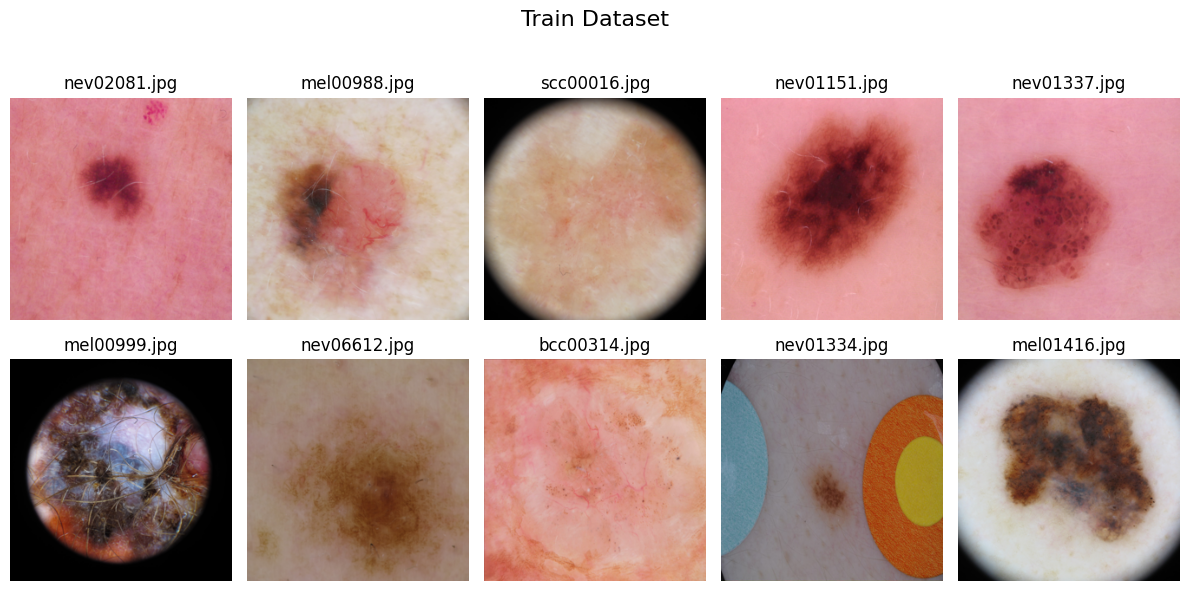

In [19]:
HEIGHT = 256
WIDTH  = 256

# Randomly select 10 rows from the train_dataframe
selected_train_images = train_dataframe.sample(n=10, random_state=42)  # Set a random seed for reproducibility

# Plot randomly selected images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, (index, row) in enumerate(selected_train_images.iterrows()):
    ax = axes[i // 5, i % 5]
    
    # Read the image using PIL
    image = Image.open(row['Image']).resize((HEIGHT,WIDTH))
    
    ax.imshow(image)  
    ax.set_title(row['FileName'])  
    ax.axis('off')

plt.suptitle("Train Dataset", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [20]:
# Create a DataFrame for the validation nevus and validation others dataset
valid_nevus_dataframe = pd.DataFrame({
    'FileName': valid_nevus_files,
    'Image': [os.path.join(valid_nevus_data_path, filename) for filename in valid_nevus_files],
    'Label': 0
})

valid_others_dataframe = pd.DataFrame({
    'FileName': valid_others_files,
    'Image': [os.path.join(valid_others_data_path, filename) for filename in valid_others_files],
    'Label': 1  
})


In [21]:
# Concatenate both the nevus train and others validation datafram 
valid_dataframe = pd.concat([valid_nevus_dataframe, valid_others_dataframe], axis=0)
valid_dataframe = valid_dataframe.sample(frac=1.0, random_state=42)
valid_dataframe.reset_index(drop=True, inplace=True)

# Total number of nevus and others in train data
total_valid_nevus  = (valid_dataframe['Label'] == 0).sum()
total_valid_others = (valid_dataframe['Label'] == 1).sum()
print('Total number of nevus in validaiton data :', total_valid_nevus)
print('Total number of others in validation data:', total_valid_others)

Total number of nevus in validaiton data : 1931
Total number of others in validation data: 1865


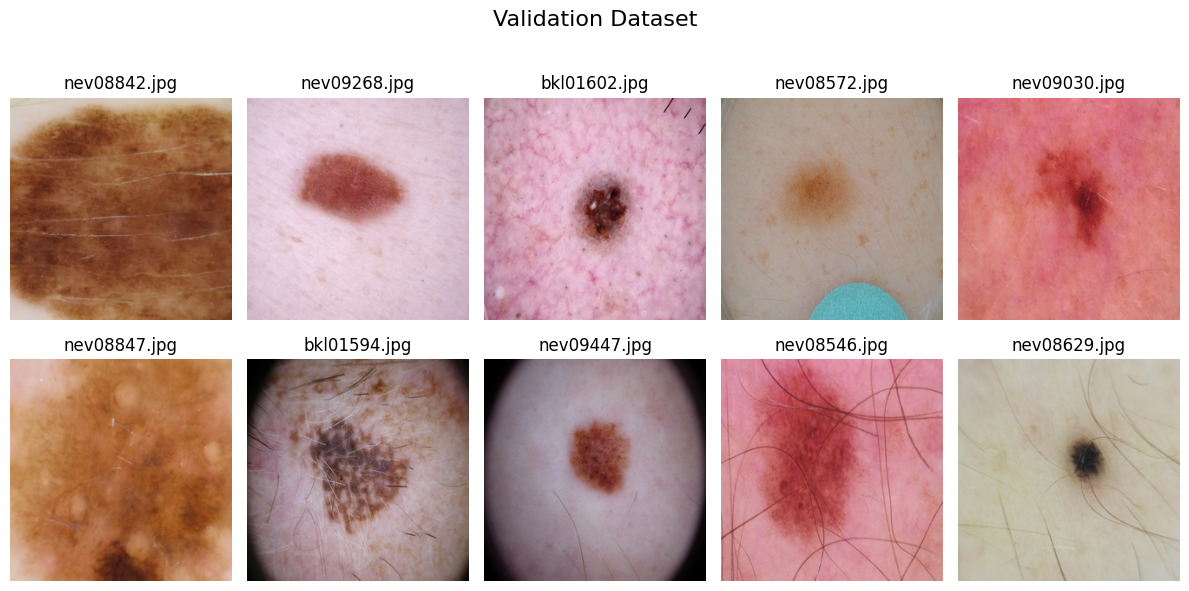

In [22]:
# Randomly select 10 rows from the train_dataframe
selected_valid_images = valid_dataframe.sample(n=10, random_state=42)  # Set a random seed for reproducibility

# Plot randomly selected images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, (index, row) in enumerate(selected_valid_images.iterrows()):
    ax = axes[i // 5, i % 5]
    
    # Read the image using PIL
    image = Image.open(row['Image']).resize((HEIGHT,WIDTH))
    
    ax.imshow(image)  
    ax.set_title(row['FileName'])  
    ax.axis('off')

plt.suptitle("Validation Dataset", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [23]:
# Create a DataFrame for the test dataset
test_dataframe = pd.DataFrame({
    'FileName': test_files,
    'Image': [os.path.join(test_data_path, filename) for filename in test_files],
})

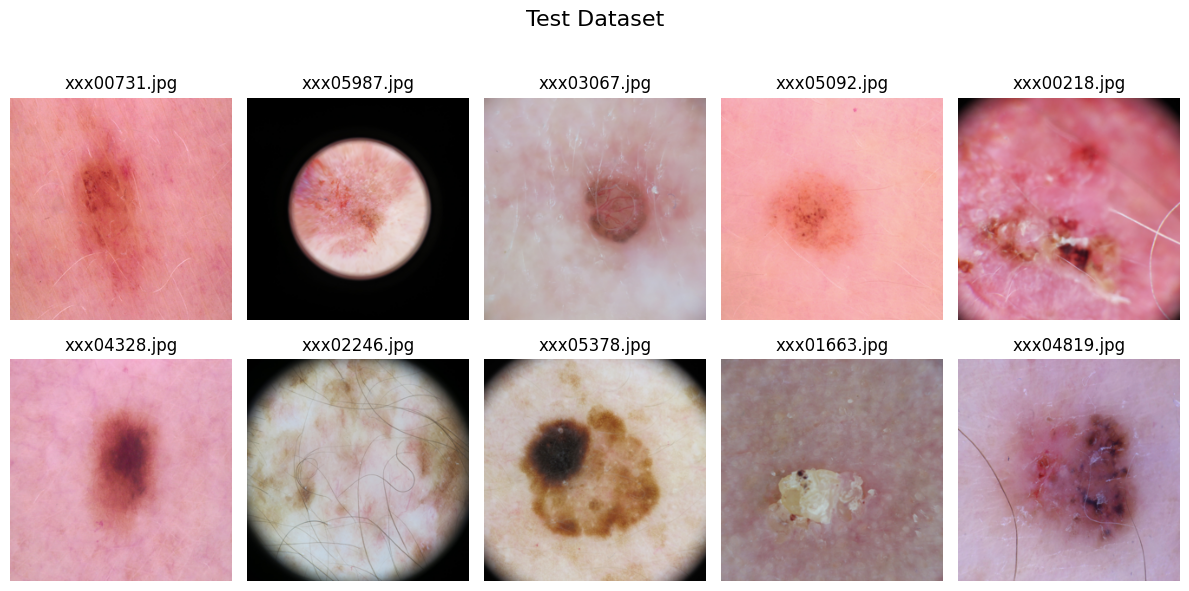

In [24]:
# Randomly select 10 rows from the validation dataframe
selected_test_images = test_dataframe.sample(n=10, random_state=42)  

# Plot randomly selected images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, (index, row) in enumerate(selected_test_images.iterrows()):
    ax = axes[i // 5, i % 5]
    
    # Read the image using PIL
    image = Image.open(row['Image']).resize((HEIGHT,WIDTH))
    
    ax.imshow(image)  
    ax.set_title(row['FileName'])  
    ax.axis('off')

plt.suptitle("Test Dataset", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Preprocessing

In [25]:
def crop_img(img, threshold=100):

    # Get the image dimensions
    h, w = img.shape[:2]
    cd = math.gcd(h, w)  # Greatest Common Divider

    # Get the coordinates of the pixels in the diagonal
    y_coords = ([i for i in range(0, h, int(h/cd))], [i for i in range(h - int(h/cd), 0, -int(h/cd))])
    x_coords = ([i for i in range(0, w, int(w/cd))], [i for i in range(0, w, int(w/cd))])

    # Get the mean value of the pixels in the diagonal, form 0,0 to h,w 
    # and from h,0 to 0,w
    coordinates = {'y1_1': 0, 'x1_1': 0, 'y2_1': h, 'x2_1': w, 'y1_2': h, 'x1_2': 0, 'y2_2': 0, 'x2_2': w}
    for i in range(2):
        d = []
        y1_aux, x1_aux = 0, 0
        y2_aux, x2_aux = h, w 
        for y, x in zip(y_coords[i], x_coords[i]):
            d.append(np.mean(img[y, x, :]))

        # Get the location of the first point where the threshold is crossed
        for idx, value in enumerate(d):
            if (value >= threshold and idx != 0):  # If there's no vignette, in idx=0 the value would be > thresh..
                coordinates['y1_' + str(i + 1)] = y_coords[i][idx]
                coordinates['x1_' + str(i + 1)] = x_coords[i][idx]
                break

        # Get the location of the last point where the threshold is crossed
        for idx, value in enumerate(reversed(d)):
            if (value >= threshold and idx != 0):  # If there's no vignette, in idx=0 the value would be > thresh..
                coordinates['y2_' + str(i + 1)] = y_coords[i][len(y_coords[i])-idx]
                coordinates['x2_' + str(i + 1)] = x_coords[i][len(x_coords[i])-idx]
                break

    # Set the coordinates to crop the image
    y1 = max(coordinates['y1_1'], coordinates['y2_2'])
    y2 = min(coordinates['y2_1'], coordinates['y1_2'])
    x1 = max(coordinates['x1_1'], coordinates['x1_2'])
    x2 = min(coordinates['x2_1'], coordinates['x2_2'])

    img_new = img[y1:y2, x1:x2, :]

    if img_new.shape[0] == 0 or img_new.shape[1] == 0:
        img_new = img 
    
    return img_new  


def inpaint(src, se_size = 15):    

    # Convert the original image to grayscale if it has > 1 channel
    if (len(src.shape)==3):
        channel = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    else:
        channel = src

    # Structuring Element for the morphological filtering
    
    se = cv2.getStructuringElement(1, (se_size, se_size))  # (17x17) '+' shaped SE
    se2 = np.array(list(reversed(list(zip(*np.eye(se_size)))))) + np.eye(se_size)
    se2[int(se_size/2), int(se_size/2)] = 1  # (17x17) 'X' shaped SE
    
    # Perform the blackHat filtering on the grayscale image to find the 
    # hair (and other objects') countours
    blackhat = cv2.morphologyEx(channel, cv2.MORPH_BLACKHAT, se)
    blackhat2 = cv2.morphologyEx(channel, cv2.MORPH_BLACKHAT, se2.astype(np.uint8))
    bHat = blackhat + blackhat2

    # Intensify the countours detected in preparation for the inpainting algorithm
    ret, thresh = cv2.threshold(bHat, 10, 255, cv2.THRESH_BINARY)

    # Inpaint the original image depending on the mask
    Inp = cv2.inpaint(src, thresh, 1, cv2.INPAINT_TELEA)

    return Inp

def shade_of_gray_cc(img, power=6, gamma=None):

    img_dtype = img.dtype

    if gamma is not None:
        img = img.astype('uint8')
        look_up_table = np.ones((256,1), dtype='uint8') * 0
        for i in range(256):
            look_up_table[i][0] = 255 * pow(i/255, 1/gamma)
        img = cv.LUT(img, look_up_table)

    img = img.astype('float32')
    img_power = np.power(img, power)
    rgb_vec = np.power(np.mean(img_power, (0,1)), 1/power)
    rgb_norm = np.sqrt(np.sum(np.power(rgb_vec, 2.0)))
    rgb_vec = rgb_vec/rgb_norm
    rgb_vec = 1/(rgb_vec*np.sqrt(3))
    img = np.multiply(img, rgb_vec)

    img = np.clip(img, a_min=0, a_max=255)
    
    return img.astype(img_dtype)

def preprocess(img, max_size, crop_params=None, cc_params=None, remove_hair_params=None):

    if crop_params is not None:
        img = crop_img(img, threshold=crop_params["threshold"])

    #img = resize_im(img, max_size)

    if cc_params is not None: 
        img = shade_of_gray_cc(img, power=cc_params["power"], gamma=cc_params["gamma"])

    if remove_hair_params is not None: 
        img = inpaint(img, se_size =  remove_hair_params['se_size'])

    return img
     

# Feature Extraction


**Function for Gray-Level Co-occurrence Matrix (GLCM), Intensity Features, Shape Features, Color-space Features Extraction**

In [33]:
# Function for GLCM features
def glcm_feature(image):
    
    # Extract the blue channel from the image
    blue_channel = image[:, :, 0]

    # Define GLCM properties
    distances = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

    # Initialize an empty dictionary to store GLCM features
    glcm_features = {}

    # Calculate GLCM for each distance and angle
    for d in distances:
        for angle in angles:
            glcm = graycomatrix(blue_channel, [d], [angle], levels=256, symmetric=True, normed=True)

            # Calculate GLCM properties
            contrast = graycoprops(glcm, 'contrast')[0, 0]
            dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
            homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
            energy = graycoprops(glcm, 'energy')[0, 0]
            correlation = graycoprops(glcm, 'correlation')[0, 0]
            entropy = -np.sum(glcm * np.log2(glcm + np.finfo(float).eps))

            # Store features in the dictionary
            glcm_features[f'Contrast_{d}_{angle*(180/math.pi)}'] = contrast
            glcm_features[f'Dissimilarity_{d}_{angle*(180/math.pi)}'] = dissimilarity
            glcm_features[f'Homogeneity_{d}_{angle*(180/math.pi)}'] = homogeneity
            glcm_features[f'Energy_{d}_{angle*(180/math.pi)}'] = energy
            glcm_features[f'Correlation_{d}_{angle*(180/math.pi)}'] = correlation
            glcm_features[f'Entropy_{d}_{angle*(180/math.pi)}'] = entropy

    # Create a Pandas DataFrame from the GLCM features
    df = pd.DataFrame([glcm_features])

    return df


# Function for Intensity features
def intensity_feature(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate intensity features
    mean_intensity = np.mean(gray_image)
    median_intensity = np.median(gray_image)
    std_dev_intensity = np.std(gray_image)
    min_intensity = np.min(gray_image)
    max_intensity = np.max(gray_image)
    skewness_intensity = skew(gray_image.flatten())
    kurtosis_intensity = kurtosis(gray_image.flatten())
    intensity_25th_percentile = np.percentile(gray_image, 25)
    intensity_75th_percentile = np.percentile(gray_image, 75)

    # Compute the intensity histogram
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    histogram_entropy = -np.sum(histogram * np.log2(histogram + np.finfo(float).eps))

    # Create a dictionary to store intensity features
    intensity_features = {
        'Mean_Intensity': mean_intensity,
        'Median_Intensity': median_intensity,
        'Std_Dev_Intensity': std_dev_intensity,
        'Min_Intensity': min_intensity,
        'Max_Intensity': max_intensity,
        'Skewness_Intensity': skewness_intensity,
        'Kurtosis_Intensity': kurtosis_intensity,
        'Intensity_25th_Percentile': intensity_25th_percentile,
        'Intensity_75th_Percentile': intensity_75th_percentile,
        'Histogram_Entropy': histogram_entropy
    }

    # Create a Pandas DataFrame from the intensity features
    df = pd.DataFrame([intensity_features])
    
    return df

# Function for Color features
def color_feature(image):
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate color features
    mean_red = np.mean(image_rgb[:, :, 0])
    mean_green = np.mean(image_rgb[:, :, 1])
    mean_blue = np.mean(image_rgb[:, :, 2])

    std_dev_red = np.std(image_rgb[:, :, 0])
    std_dev_green = np.std(image_rgb[:, :, 1])
    std_dev_blue = np.std(image_rgb[:, :, 2])

    skewness_red = skew(image_rgb[:, :, 0].flatten())
    skewness_green = skew(image_rgb[:, :, 1].flatten())
    skewness_blue = skew(image_rgb[:, :, 2].flatten())

    min_red = np.min(image_rgb[:, :, 0])
    max_red = np.max(image_rgb[:, :, 0])
    min_green = np.min(image_rgb[:, :, 1])
    max_green = np.max(image_rgb[:, :, 1])
    min_blue = np.min(image_rgb[:, :, 2])
    max_blue = np.max(image_rgb[:, :, 2])

    variance_red = np.var(image_rgb[:, :, 0])
    variance_green = np.var(image_rgb[:, :, 1])
    variance_blue = np.var(image_rgb[:, :, 2])

    # Convert the image to HSV color space
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Calculate HSV features
    mean_hue = np.mean(image_hsv[:, :, 0])
    mean_saturation = np.mean(image_hsv[:, :, 1])
    mean_value = np.mean(image_hsv[:, :, 2])

    std_dev_hue = np.std(image_hsv[:, :, 0])
    std_dev_saturation = np.std(image_hsv[:, :, 1])
    std_dev_value = np.std(image_hsv[:, :, 2])

    skewness_hue = skew(image_hsv[:, :, 0].flatten())
    skewness_saturation = skew(image_hsv[:, :, 1].flatten())
    skewness_value = skew(image_hsv[:, :, 2].flatten())

    min_hue = np.min(image_hsv[:, :, 0])
    max_hue = np.max(image_hsv[:, :, 0])
    min_saturation = np.min(image_hsv[:, :, 1])
    max_saturation = np.max(image_hsv[:, :, 1])
    min_value = np.min(image_hsv[:, :, 2])
    max_value = np.max(image_hsv[:, :, 2])

    variance_hue = np.var(image_hsv[:, :, 0])
    variance_saturation = np.var(image_hsv[:, :, 1])
    variance_value = np.var(image_hsv[:, :, 2])

    # Convert the image to LAB color space
    image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)

    # Calculate LAB features
    mean_l = np.mean(image_lab[:, :, 0])
    mean_a = np.mean(image_lab[:, :, 1])
    mean_b = np.mean(image_lab[:, :, 2])

    std_dev_l = np.std(image_lab[:, :, 0])
    std_dev_a = np.std(image_lab[:, :, 1])
    std_dev_b = np.std(image_lab[:, :, 2])

    skewness_l = skew(image_lab[:, :, 0].flatten())
    skewness_a = skew(image_lab[:, :, 1].flatten())
    skewness_b = skew(image_lab[:, :, 2].flatten())

    min_l = np.min(image_lab[:, :, 0])
    max_l = np.max(image_lab[:, :, 0])
    min_a = np.min(image_lab[:, :, 1])
    max_a = np.max(image_lab[:, :, 1])
    min_b = np.min(image_lab[:, :, 2])
    max_b = np.max(image_lab[:, :, 2])

    variance_l = np.var(image_lab[:, :, 0])
    variance_a = np.var(image_lab[:, :, 1])
    variance_b = np.var(image_lab[:, :, 2])

    # Calculate entropy for the grayscale image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    histogram /= histogram.sum()
    entropy = -np.sum(histogram * np.log2(histogram + np.finfo(float).eps))

    # Calculate normalized histograms for all color spaces
    histogram_rgb = {}
    histogram_hsv = {}
    histogram_lab = {}

    for channel in range(3):
        hist = cv2.calcHist([image_rgb], [channel], None, [256], [0, 256])
        hist /= hist.sum()
        flattened_hist = hist.flatten()
        histogram_rgb[f'Hist_R_{channel}'] = flattened_hist

    for channel in range(3):
        hist = cv2.calcHist([image_hsv], [channel], None, [256], [0, 256])
        hist /= hist.sum()
        flattened_hist = hist.flatten()
        histogram_hsv[f'Hist_H_{channel}'] = flattened_hist

    for channel in range(3):
        hist = cv2.calcHist([image_lab], [channel], None, [256], [0, 256])
        hist /= hist.sum()
        flattened_hist = hist.flatten()
        histogram_lab[f'Hist_L_{channel}'] = flattened_hist

    # Create a dictionary to store all features
    features = {
        'Mean_Red': mean_red,
        'Mean_Green': mean_green,
        'Mean_Blue': mean_blue,
        'Std_Dev_Red': std_dev_red,
        'Std_Dev_Green': std_dev_green,
        'Std_Dev_Blue': std_dev_blue,
        'Skewness_Red': skewness_red,
        'Skewness_Green': skewness_green,
        'Skewness_Blue': skewness_blue,
        'Min_Red': min_red,
        'Max_Red': max_red,
        'Min_Green': min_green,
        'Max_Green': max_green,
        'Min_Blue': min_blue,
        'Max_Blue': max_blue,
        'Variance_Red': variance_red,
        'Variance_Green': variance_green,
        'Variance_Blue': variance_blue,
        'Mean_Hue': mean_hue,
        'Mean_Saturation': mean_saturation,
        'Mean_Value': mean_value,
        'Std_Dev_Hue': std_dev_hue,
        'Std_Dev_Saturation': std_dev_saturation,
        'Std_Dev_Value': std_dev_value,
        'Skewness_Hue': skewness_hue,
        'Skewness_Saturation': skewness_saturation,
        'Skewness_Value': skewness_value,
        'Min_Hue': min_hue,
        'Max_Hue': max_hue,
        'Min_Saturation': min_saturation,
        'Max_Saturation': max_saturation,
        'Variance_Hue': variance_hue,
        'Variance_Saturation': variance_saturation,
        'Variance_Value': variance_value,
        'Mean_L': mean_l,
        'Mean_A': mean_a,
        'Mean_B': mean_b,
        'Std_Dev_L': std_dev_l,
        'Std_Dev_A': std_dev_a,
        'Std_Dev_B': std_dev_b,
        'Skewness_L': skewness_l,
        'Skewness_A': skewness_a,
        'Skewness_B': skewness_b,
        'Min_L': min_l,
        'Max_L': max_l,
        'Min_A': min_a,
        'Max_A': max_a,
        'Min_B': min_b,
        'Max_B': max_b,
        'Variance_L': variance_l,
        'Variance_A': variance_a,
        'Variance_B': variance_b,
        'Entropy': entropy
    }

    
    # Create a Pandas DataFrame from the features
    df = pd.DataFrame([features])

    return df
                                 
                                 
def shape_feature(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to create a binary mask of the lesion
    _, binary_mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize shape features as zeros
    shape_features = {
        'Perimeter': 0.0,
        'Area': 0.0,
        'Circularity': 0.0,
        'Compactness': 0.0,
        'Hue_Moment_1': 0.0,
        'Hue_Moment_2': 0.0
    }
    
    # Check if there are any contours
    if contours:
        # Find the contour with the maximum area (assumed to be the lesion)
        max_contour = max(contours, key=cv2.contourArea)
        
        # Calculate shape features
        shape_features['Perimeter'] = cv2.arcLength(max_contour, closed=True)
        shape_features['Area'] = cv2.contourArea(max_contour)
        
        # Handle division by zero for circularity
        perimeter = shape_features['Perimeter']
        area = shape_features['Area']
        if perimeter > 0:
            shape_features['Circularity'] = (4 * np.pi * area) / (perimeter * perimeter)
        
        # Calculate Compactness (Inverse of Circularity)
        if shape_features['Circularity'] > 0:
            shape_features['Compactness'] = 1 / shape_features['Circularity']

        # Calculate Hue Moments
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hue_channel = hsv_image[:, :, 0]
        moments = cv2.moments(hue_channel)
        shape_features['Hue_Moment_1'] = moments['nu20']
        shape_features['Hue_Moment_2'] = moments['nu02']
    
    # Create a Pandas DataFrame from the features
    df = pd.DataFrame([shape_features])
    
    return df
                                 
                                 
# Function for LBP features
def lbp_feature(image):
    
    # Extract the blue channel from the image
    blue_channel_image = image[:, :, 0]
    
    radius = 1
    n_points = 8
    
    # Compute LBP features
    lbp_image = feature.local_binary_pattern(blue_channel_image, n_points, radius, method='uniform')
    
    # Calculate LBP histogram
    lbp_hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-8)

    # Create a dictionary to store LBP features
    lbp_features = {}
    for i, hist_value in enumerate(lbp_hist):
        lbp_features[f'LBP_Hist_{i}'] = hist_value
    
    # Create a Pandas DataFrame from the features
    df = pd.DataFrame([lbp_features])
    
    return df


# Function for Haralick Texture Features
def haralick_texture_feature(image):
    # Extract the blue channel from the image
    blue_channel_image = image[:, :, 0]
    
    # Compute Haralick Texture Features
    textures = mt.features.haralick(blue_channel_image)
    
    # Calculate the mean of each texture feature
    mean_textures = textures.mean(axis=0)
    
    # Create a dictionary to store Haralick Texture Features
    haralick_features = {}
    for i, feature in enumerate(mean_textures):
        haralick_features[f'Haralick_{i}'] = feature
    
    # Create a Pandas DataFrame from the features
    df = pd.DataFrame([haralick_features])
    
    return df

# Function for Wavelet Transform Features
def wavelet_transform_feature(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the wavelet transform
    coeffs = pywt.wavedec2(gray_image, 'db1', level=4)  # Adjust the wavelet type and level as needed
    
    # Extract features from the wavelet coefficients
    wavelet_features = {}
    for i, coeff in enumerate(coeffs):
        wavelet_features[f'Wavelet_Level_{i}_Mean'] = np.mean(coeff)
        wavelet_features[f'Wavelet_Level_{i}_Std'] = np.std(coeff)
        wavelet_features[f'Wavelet_Level_{i}_Energy'] = np.sum(np.square(coeff))
    
    # Create a Pandas DataFrame from the features
    df = pd.DataFrame([wavelet_features])
    
    return df

**Features Extraction from Train Dataset**

In [34]:
# Initialize empty lists to store the results
train_glcm_results_list = []
train_hog_results_list = []
train_intensity_results_list = []
train_color_results_list = []
train_shape_results_list = []
train_lbp_results_list = []
train_haralick_results_list=[]
train_wavelet_results_list = []
train_file_name_list =[]

# Iterate through the rows of the DataFrame
for image_path in tqdm(train_dataframe['Image'], desc="Train Features Extraction Progressing"):
    
    # Read the image
    image = Image.open(image_path)
    image = np.array(image)
    #image = preprocess(image, 500, crop_params= {"threshold": 50}, cc_params={"gamma": None, "power":6}, remove_hair_params={'se_size': 9})
    
    # Extract features using your feature extraction functions
    glcm_results = glcm_feature(image)
    intensity_results = intensity_feature(image)
    color_results = color_feature(image)
    shape_results = shape_feature(image)
    lbp_results = lbp_feature(image)
    haralick_results = haralick_texture_feature(image)
    wavelet_results = wavelet_transform_feature(image)
    
    # Append the results to the corresponding lists
    train_glcm_results_list.append(glcm_results)
    train_intensity_results_list.append(intensity_results)
    train_color_results_list.append(color_results)
    train_shape_results_list.append(shape_results)
    train_lbp_results_list.append(lbp_results)
    train_haralick_results_list.append(haralick_results)
    train_wavelet_results_list.append(wavelet_results)
    
    # Extract the file name from the image path
    file_name = os.path.basename(image_path)
    train_file_name_list.append(file_name)

Train Features Extraction Progressing: 100%|███████████████████████████████████| 15195/15195 [6:09:03<00:00,  1.46s/it]


In [35]:
# Concatenate the results into DataFrames
train_glcm_features_dataframe      = pd.concat(train_glcm_results_list,ignore_index=True)
train_intensity_features_dataframe = pd.concat(train_intensity_results_list, ignore_index=True)
train_color_features_dataframe     = pd.concat(train_color_results_list, ignore_index=True)
train_shape_features_dataframe     = pd.concat(train_shape_results_list, ignore_index=True)
train_lbp_features_dataframe       = pd.concat(train_lbp_results_list, ignore_index=True)

train_haralick_features_dataframe  = pd.concat(train_haralick_results_list,ignore_index=True)
train_wavelet_features_dataframe   = pd.concat(train_wavelet_results_list,ignore_index=True)

train_file_name_datafram           = pd.DataFrame(train_file_name_list)

# Combine all feature DataFrames into one DataFrame
train_features = pd.concat(
    [train_glcm_features_dataframe, train_intensity_features_dataframe, train_color_features_dataframe, 
     train_shape_features_dataframe, train_lbp_features_dataframe, train_haralick_features_dataframe, train_wavelet_features_dataframe], axis=1  
)

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the train_features DataFrame
train_features_normalized = scaler.fit_transform(train_features)

# Convert the normalized array back to a DataFrame (optional)
train_features_normalized_df = pd.DataFrame(train_features_normalized, columns=train_features.columns)

train_features = pd.concat(
    [train_file_name_datafram, train_features_normalized_df, train_dataframe['Label']],
    axis=1  # Concatenate along columns
)

train_features.to_csv('train_features.csv', index=False)

train_features

,0,Contrast_1_0.0,Dissimilarity_1_0.0,Homogeneity_1_0.0,Energy_1_0.0,Correlation_1_0.0,Entropy_1_0.0,Contrast_1_45.0,Dissimilarity_1_45.0,Homogeneity_1_45.0,...,Wavelet_Level_2_Mean,Wavelet_Level_2_Std,Wavelet_Level_2_Energy,Wavelet_Level_3_Mean,Wavelet_Level_3_Std,Wavelet_Level_3_Energy,Wavelet_Level_4_Mean,Wavelet_Level_4_Std,Wavelet_Level_4_Energy,Label
0,bcc00709.jpg,-0.332310,-1.073120,2.384004,5.195033,0.616621,-2.514762,-0.315171,-1.022343,2.579226,...,-0.040774,0.599562,0.654269,-0.084807,-0.058020,0.110286,0.011758,-0.456162,-0.144447,1
1,ack00336.jpg,-0.359302,-0.407451,0.343033,1.215047,0.610337,-0.376649,-0.409498,-0.572267,0.517698,...,-0.022726,-0.660532,-0.270947,-0.067258,-0.868009,-0.375868,0.094890,-0.614284,-0.236218,1
2,bkl01484.jpg,-0.231521,0.013943,-0.405520,-0.135294,-1.331716,-0.522256,-0.279220,-0.074352,-0.391822,...,0.482057,-0.294013,-0.452304,0.470013,-0.222028,-0.423225,0.258627,-0.194246,-0.403555,1
3,mel02655.jpg,0.282087,0.824275,-0.843231,-0.781513,0.410977,1.588021,0.243046,0.825328,-0.829664,...,0.088992,1.770469,2.058160,0.037574,1.481255,1.855343,0.291163,1.129745,1.417314,1
4,nev05050.jpg,0.627378,1.500649,-1.429772,-0.516568,-0.186484,0.765106,0.665859,1.591652,-1.424470,...,-0.204889,0.352922,-0.324506,0.941391,0.680013,-0.209859,0.227790,0.798013,-0.156083,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15190,nev05192.jpg,-0.515874,-1.449486,2.762884,4.675273,0.624101,-2.969425,-0.505994,-1.425119,2.989808,...,-0.061925,-0.454167,-0.160996,-0.117652,-0.887504,-0.383896,0.075210,-1.087799,-0.441691,0
15191,mel01464.jpg,-0.088583,-0.820549,1.298131,0.521625,-0.323068,-1.425759,-0.012698,-0.734612,1.112400,...,1.371931,-0.257891,-0.225163,0.973163,-0.066412,-0.121416,0.201268,0.009087,-0.058387,1
15192,nev05391.jpg,-0.358338,-0.218541,-0.347166,-0.040305,-0.723481,-0.779464,-0.408471,-0.407648,-0.161820,...,0.005489,-1.402082,-0.531671,-0.054738,-1.099134,-0.459945,0.153769,-0.601703,-0.229340,0
15193,nev00861.jpg,-0.370159,-0.565674,0.456794,0.257437,0.052450,-0.840050,-0.403805,-0.617970,0.420010,...,0.250474,-0.565474,-0.493507,0.209616,-0.458119,-0.463288,0.080589,-0.525543,-0.460002,0




**Features Extraction from Validation Dataset**

In [ ]:
# Initialize empty lists to store the results
valid_glcm_results_list = []
valid_hog_results_list = []
valid_intensity_results_list = []
valid_color_results_list = []
valid_shape_results_list = []
valid_lbp_results_list =[]
valid_haralick_results_list=[]
valid_wavelet_results_list = []
valid_file_name_list = []

# Iterate through the rows of the DataFrame
for image_path in tqdm(valid_dataframe['Image'], desc="Validation Features Extraction Progressing"):
    
    # Read the image
    image = Image.open(image_path)
    image = np.array(image)
    #image = preprocess(image, 500, crop_params= {"threshold": 50}, cc_params={"gamma": None, "power":6}, remove_hair_params={'se_size': 9})
    
    # Extract features using your feature extraction functions
    glcm_results = glcm_feature(image)
    intensity_results = intensity_feature(image)
    color_results = color_feature(image)
    shape_results = shape_feature(image)
    lbp_results   = lbp_feature(image)
    haralick_results = haralick_texture_feature(image)
    wavelet_results = wavelet_transform_feature(image)
    
    # Append the results to the corresponding lists
    valid_glcm_results_list.append(glcm_results)
    valid_intensity_results_list.append(intensity_results)
    valid_color_results_list.append(color_results)
    valid_lbp_results_list.append(lbp_results)
    valid_shape_results_list.append(shape_results)
    valid_haralick_results_list.append(haralick_results)
    valid_wavelet_results_list.append(wavelet_results)
    
    # Extract the file name from the image path
    file_name = os.path.basename(image_path)
    valid_file_name_list.append(file_name)



In [ ]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Concatenate the results into DataFrames
valid_glcm_features_dataframe = pd.concat(valid_glcm_results_list, ignore_index=True)
valid_intensity_features_dataframe = pd.concat(valid_intensity_results_list, ignore_index=True)
valid_color_features_dataframe = pd.concat(valid_color_results_list, ignore_index=True)
valid_shape_features_dataframe = pd.concat(valid_shape_results_list, ignore_index=True)
valid_lbp_features_dataframe = pd.concat(valid_lbp_results_list, ignore_index=True)

valid_haralick_features_dataframe  = pd.concat(valid_haralick_results_list,ignore_index=True)
valid_wavelet_features_dataframe   = pd.concat(valid_wavelet_results_list,ignore_index=True)

valid_file_name_dataframe = pd.DataFrame(valid_file_name_list)

# Combine all feature DataFrames into one DataFrame
valid_features = pd.concat(
    [valid_glcm_features_dataframe, valid_intensity_features_dataframe, valid_color_features_dataframe,
     valid_shape_features_dataframe, valid_lbp_features_dataframe, valid_haralick_features_dataframe, valid_wavelet_features_dataframe], axis=1  # Concatenate along columns
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the valid_features DataFrame
valid_features_normalized = scaler.fit_transform(valid_features)

# Convert the normalized array back to a DataFrame (optional)
valid_features_normalized_df = pd.DataFrame(valid_features_normalized, columns=valid_features.columns)

valid_features = pd.concat(
    [valid_file_name_dataframe, valid_features_normalized_df, valid_dataframe['Label']],
    axis=1  # Concatenate along columns
)

# Assuming you have a DataFrame named 'valid_features'
valid_features.to_csv('valid_features.csv', index=False)

valid_features

In [ ]:
# Initialize empty lists to store the results
test_glcm_results_list      = []
test_intensity_results_list = []
test_color_results_list     = []
test_shape_results_list     = []
test_lbp_results_list       = []
test_haralick_results_list  = []
test_wavelet_results_list   = []
test_file_name_list         = []

# Iterate through the rows of the DataFrame
for image_path in tqdm(test_dataframe['Image'], desc="Test Features Extraction Progressing"):
    
    # Read the image
    image = Image.open(image_path)
    image = np.array(image)
    #image = preprocess(image, 500, crop_params= {"threshold": 50}, cc_params={"gamma": None, "power":6}, remove_hair_params={'se_size': 9})
    
    # Extract features using your feature extraction functions
    glcm_results      = glcm_feature(image)
    intensity_results = intensity_feature(image)
    color_results     = color_feature(image)
    shape_results     = shape_feature(image)
    lbp_results       = lbp_feature(image)
    haralick_results  = haralick_texture_feature(image)
    wavelet_results   = wavelet_transform_feature(image)
    
    # Append the results to the corresponding lists
    test_glcm_results_list.append(glcm_results)
    test_intensity_results_list.append(intensity_results)
    test_color_results_list.append(color_results)
    test_lbp_results_list.append(lbp_results)
    test_shape_results_list.append(shape_results)
    test_haralick_results_list.append(haralick_results)
    test_wavelet_results_list.append(wavelet_results)
    
    # Extract the file name from the image path
    file_name = os.path.basename(image_path)
    test_file_name_list.append(file_name)



In [ ]:
# Concatenate the results into DataFrames
test_glcm_features_dataframe      = pd.concat(test_glcm_results_list, ignore_index=True)
test_intensity_features_dataframe = pd.concat(test_intensity_results_list, ignore_index=True)
test_color_features_dataframe     = pd.concat(test_color_results_list, ignore_index=True)
test_shape_features_dataframe     = pd.concat(test_shape_results_list, ignore_index=True)
test_lbp_features_dataframe       = pd.concat(test_lbp_results_list, ignore_index=True)

test_haralick_features_dataframe  = pd.concat(test_haralick_results_list,ignore_index=True)
test_wavelet_features_dataframe   = pd.concat(test_wavelet_results_list,ignore_index=True)

test_file_name_dataframe = pd.DataFrame(test_file_name_list)

# Combine all feature DataFrames into one DataFrame
test_features = pd.concat(
    [test_glcm_features_dataframe, test_intensity_features_dataframe, test_color_features_dataframe,
     test_shape_features_dataframe, test_lbp_features_dataframe, test_haralick_features_dataframe, test_wavelet_features_dataframe], axis=1  # Concatenate along columns
)

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the valid_features DataFrame
test_features_normalized = scaler.fit_transform(test_features)

# Convert the normalized array back to a DataFrame (optional)
test_features_normalized_df = pd.DataFrame(test_features_normalized, columns=test_features.columns)

test_features = pd.concat(
    [test_file_name_dataframe, test_features_normalized_df],
    axis=1  # Concatenate along columns
)

# Assuming you have a DataFrame named 'valid_features'
test_features.to_csv('test_features.csv', index=False)

test_features

# Classification

In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA  # Import PCA

from sklearn.utils import shuffle, resample
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
import time
import xgboost as xgb

# Load your data
train_df_path = 'D:/Erasmus Mundus Masters/University of Girona/Computer Aided Diagnosis/Challegne-1/train_features.csv'
valid_df_path = 'D:/Erasmus Mundus Masters/University of Girona/Computer Aided Diagnosis/Challegne-1/valid_features.csv'
test_df_path  = 'D:/Erasmus Mundus Masters/University of Girona/Computer Aided Diagnosis/Challegne-1/test_features.csv'

train_df = pd.read_csv(train_df_path)
valid_df = pd.read_csv(valid_df_path)
test_df  = pd.read_csv(test_df_path)

# Extract features and labels
train_features = train_df.iloc[:, 1:-1]
train_labels = train_df['Label']

valid_features = valid_df.iloc[:, 1:-1]
valid_labels = valid_df['Label']

# Extract features and labels from the test dataframe
test_features = test_df.iloc[:, 1:]



In [52]:
test_df

,0,Contrast_1_0.0,Dissimilarity_1_0.0,Homogeneity_1_0.0,Energy_1_0.0,Correlation_1_0.0,Entropy_1_0.0,Contrast_1_45.0,Dissimilarity_1_45.0,Homogeneity_1_45.0,...,Wavelet_Level_1_Energy,Wavelet_Level_2_Mean,Wavelet_Level_2_Std,Wavelet_Level_2_Energy,Wavelet_Level_3_Mean,Wavelet_Level_3_Std,Wavelet_Level_3_Energy,Wavelet_Level_4_Mean,Wavelet_Level_4_Std,Wavelet_Level_4_Energy
0,xxx00001.jpg,-0.426988,-0.714245,0.522274,-0.069668,0.587933,-0.312206,-0.446484,-0.698639,0.432502,...,-0.033234,-1.353458,-0.714335,-0.271971,-1.173905,-0.882887,-0.350883,-0.679734,-0.873031,-0.335630
1,xxx00002.jpg,-0.236865,0.142667,-0.779908,-0.301166,-1.007178,-0.282614,-0.169741,0.409961,-1.045773,...,-0.590876,0.384665,-0.721484,-0.457024,0.260661,-0.514696,-0.422679,0.333009,-0.372738,-0.400987
2,xxx00003.jpg,-0.476662,-1.070653,1.542423,0.153162,0.600786,-0.340636,-0.500186,-1.091530,1.650918,...,0.168541,0.267504,-0.543894,-0.194777,0.137067,-0.863398,-0.343794,0.231741,-1.013952,-0.386533
3,xxx00004.jpg,-0.393292,-0.615586,0.485463,-0.017883,0.596385,-0.089867,-0.426112,-0.653940,0.513508,...,0.392294,-0.198107,-0.116807,0.045026,-0.108248,-0.394922,-0.121743,0.039506,-0.561191,-0.192102
4,xxx00005.jpg,-0.424291,-1.165562,2.456927,5.263534,0.600521,-2.411343,-0.437573,-1.153635,2.709533,...,0.621574,-0.079711,-0.120053,0.042955,-0.054975,-0.511050,-0.185623,-0.012040,-0.759001,-0.288116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,xxx06336.jpg,-0.433955,-0.772825,0.777334,-0.053963,0.572021,-0.145035,-0.460140,-0.784278,0.710267,...,-0.469692,-0.119380,-1.182332,-0.430909,-0.282311,-1.045643,-0.404567,0.070118,-0.870569,-0.334696
6336,xxx06337.jpg,-0.379244,-0.896785,1.570116,2.546173,0.600100,-1.398309,-0.404067,-0.877776,1.601802,...,0.630626,-0.011117,-0.049433,0.088854,0.028951,-0.400335,-0.124849,-0.015315,-0.566779,-0.195050
6337,xxx06338.jpg,-0.447987,-1.034910,1.414427,-0.074235,0.584560,-0.265914,-0.464939,-1.056857,1.495820,...,-0.211416,-0.581828,-0.587991,-0.215794,-0.409888,-0.723691,-0.287486,-0.070451,-0.866528,-0.333104
6338,xxx06339.jpg,0.035059,0.643340,-1.074344,-0.478138,-0.631961,0.388191,-0.037579,0.552816,-1.025064,...,-0.536611,1.111927,-0.312244,-0.404182,0.797413,-0.086117,-0.354387,0.519157,0.033864,-0.327622


In [ ]:
Baseline Model

In [ ]:
# Training the Baseline model 
strt= time.time()

# Define a PowerTransformer to make the inputs more gaussian-like
transform = PowerTransformer(method='yeo-johnson', standardize=True) 

# Set the tolerance to a large value to make the example faster
knn           = KNeighborsClassifier(n_neighbors = 1)
baseline_pipe = Pipeline(steps=[("pp", transform), ("knn", knn)])

# Fit the basline pipeline 
baseline_pipe.fit(train_features, train_labels)

# Find the validation predicton
valid_predict_baseline = baseline_pipe.predict(valid_features)

# Compute the scores
scores = validate_mc(valid_predict_baseline, valid_labels) 

end = time.time()

#  Print the scores
print('Total Time =', (end-strt))
print('Scores NN classifier - all training data :', scores)

# KNN

In [ ]:
# Initialize
strt = time.time()

# Create class for standard scalar
scaler = StandardScaler()

# Create class for KNN Classifier
knn = KNeighborsClassifier()

# Develop the pipeline using Tranformer and KNN
pipeline = Pipeline(steps=[("pp", transform), ("knn", knn)])

# Define parameters for KNN model for GridSearch to get the best parameter
params = {'knn__n_neighbors':[5, 10, 13, 15, 20, 30, 50, 75, 100]}  

# Perform GridSearch for finding the best parameter
grid_search = GridSearchCV(pipeline, param_grid=params , cv=5, n_jobs=-1, scoring='balanced_accuracy')   

# Fit GridSearch (Training)
grid_search.fit(train_features, train_labels)

# Print the best training score and the best parameters
print('Training best_score_ :',grid_search.best_score_)
print('Best Parameters', grid_search.best_params_)

# Make the best model with Grid Search Parameter
knn_sm_a = grid_search.best_estimator_

# Predict the validation features using the best model
y_pred = knn_sm_a.predict(valid_features)  

# Compute the scores
knn_scores = validate_mc(y_pred, valid_labels)  

end = time.time()

# Print the scores 
print('Total Time =', (end-strt))
print('Scores KNN classifier :', knn_scores)

In [ ]:
XGBoost

In [ ]:
# TRAIN SUBSET
import xgboost as xgb 
# Initialize
strt = time.time()
xgboost = xgb.XGBClassifier(objective="multi:softmax", num_class=3)

pipeline = Pipeline(steps=[("pp", transform), ("xgb", xgboost)])
params = {'xgb__n_estimators':[100, 500, 1000, 2000], 'xgb__max_depth': [3, 5, 7, 9, 13], 'xgb__learning_rate': [0.01, 0.1]}  # Parameter to be used in the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=params , cv=5, n_jobs=-1, scoring='balanced_accuracy')  # CV Gridsearch with the BMA metric to evaluate the CV performances

# Grid Search - Training
grid_search.fit(train_features, train_labels)
print('Training best_score_ :',grid_search.best_score_)
print('Best Parameters', grid_search.best_params_)

# Final model
xgb_sm_a = grid_search.best_estimator_

# Evaluation
y_pred = xgb_sm_a.predict(valid_features)  # Predictions
xgb_scores = validate_mc(y_pred, valid_labels)  # Compute the scores

end = time.time()
print('Total Time =', (end-strt))
print('Scores XGB classifier :', xgb_scores)

In [ ]:
SVM

In [ ]:
# TRAIN SUBSET 

# Initialize
strt = time.time()
model = SVC(probability=True, gamma='auto', class_weight='balanced', random_state=42)
pipeline = Pipeline(steps=[("pp", transform), ("svm", model)])
params = {'svm__kernel':['rbf'], 'svm__C': [0.01, 0.5, 1, 5, 10, 11] }  # Parameter to be used in the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=params , cv=5, n_jobs=-1, scoring='balanced_accuracy', verbose=4)  

# Grid Search - Training
grid_search.fit(train_features, train_labels)
print('Training best_score_ :',grid_search.best_score_)
print('Best Parameters', grid_search.best_params_)

# Final model
svm_sm_a = grid_search.best_estimator_

# Evaluation
y_pred = svm_sm_a.predict(valid_features)  # Predictions
scores = validate_mc(y_pred, valid_labels)  # Compute the scores

end = time.time()
print('Total Time =', (end-strt))
print('Scores KNN classifier :', scores)

In [ ]:
Xtree

In [ ]:
# TRAIN SUBSET

# Initialize
strt = time.time()
xt = ExtraTreesClassifier()  # XT classifier
pipeline = Pipeline(steps=[("pp", transform), ("xt", xt)])
params = {'xt__n_estimators':[100, 500, 1000, 2000], 'xt__criterion' : ['entropy','gini'], 'xt__max_depth': [3, 5, 7, 9, 13]}  # Parameter to be used in the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=params , cv=5, n_jobs=-1, scoring='balanced_accuracy')  # CV Gridsearch with the BMA metric to evaluate the CV performances

# Grid Search - Training
grid_search.fit(train_features, train_labels)
print('Training best_score_ :',grid_search.best_score_)
print('Best Parameters', grid_search.best_params_)

# Final model
xt_sm_a = grid_search.best_estimator_

# Evaluation
y_pred = xt_sm_a.predict(valid_features)  # Predictions
xt_scores = validate_mc(y_pred, valid_labels)  # Compute the scores

end = time.time()
print('Total Time =', (end-strt))
print('Scores XT classifier :', xt_scores)

In [ ]:
Majority Votaing

In [45]:
def validate_binary(predictions, labels, probabilities = None): 
  '''
    function to evaluate the results of a binary classification 
    Args: 
      - predictions: labels predicted by the model 
      - labels: ground truths 
      - probabilities: probabilities predicted by the model
    returns: confusion matrix, kappa and accuracy stored in a dict
  '''

  scores = {
      "confusion_matrix": confusion_matrix(labels, predictions),
      "accuracy": accuracy_score(labels, predictions),
      "kappa": cohen_kappa_score(labels, predictions)
  }

  return scores

In [42]:
# models
knn = KNeighborsClassifier(n_neighbors=20)
svm = SVC(probability=True, gamma='auto', class_weight='balanced', random_state=42, kernel = 'rbf', C = 8)
rf = RandomForestClassifier(n_estimators = 500, criterion='gini', max_depth = 20)
xgboost = xgb.XGBClassifier(objective='binary:logistic', n_estimators=2000, max_depth=9, learning_rate=0.1)
xtree = ExtraTreesClassifier(n_estimators = 500, criterion='gini', max_depth = 40)

In [48]:
estimators = [
    ('xtree', xtree),
    ('svm', svm),
    ('xgboost', xgboost),
 ]

strt = time.time()
voter = VotingClassifier( estimators=estimators, voting = 'soft' )
transform = PowerTransformer(method='yeo-johnson', standardize=True)
voting_pipe = Pipeline(steps=[('pp', transform), ('model', voter)])
# Training
voting_pipe.fit(train_features, train_labels)

# Evaluation
y_pred = voting_pipe.predict(valid_features)  # Predictions
scores = validate_binary(y_pred, valid_labels)  # Compute the scores

end = time.time()
print('Time :', (end-strt))
print('Scores :', scores)

Time : 434.07635974884033
Scores : {'confusion_matrix': array([[1626,  305],
       [ 275, 1590]], dtype=int64), 'accuracy': 0.8472075869336143, 'kappa': 0.6944067756616944}


In [49]:
estimators = [
    ('xtree', xtree),
    ('svm', svm),
    ('xgboost', xgboost),
 ]

strt = time.time()
voter = VotingClassifier( estimators=estimators, voting = 'hard' )
transform = PowerTransformer(method='yeo-johnson', standardize=True)
voting_pipe_hard = Pipeline(steps=[('pp', transform), ('model', voter)])
# Training
voting_pipe_hard.fit(train_features, train_labels)

# Evaluation
y_pred = voting_pipe_hard.predict(valid_features)  # Predictions
scores = validate_binary(y_pred, valid_labels)  # Compute the scores

end = time.time()
print('Time :', (end-strt))
print('Scores :', scores)

Time : 426.27360939979553
Scores : {'confusion_matrix': array([[1617,  314],
       [ 271, 1594]], dtype=int64), 'accuracy': 0.8458904109589042, 'kappa': 0.6918090539018423}


In [53]:
test_predict = voting_pipe.predict(test_features)

In [54]:
# Convert to a dataframe
test_predict_df = pd.DataFrame(test_predict, columns=["Predicted_Label"])
# Save the dataframe as a CSV file
test_predict_df.to_csv('test_prediction.csv', index=False)

In [55]:
test_predict_df

,Predicted_Label
0,0
1,0
2,0
3,1
4,1
...,...
6335,0
6336,1
6337,1
6338,0


In [28]:
# Train and evaluate the Random Forest classifier on PCA-transformed features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)
cross_val_scores = cross_val_score(rf_classifier, train_features, train_labels, cv=10)
print('Cross Validation Results: ', cross_val_scores)
print('Best CV Result: ', np.max(cross_val_scores))

rf_predictions = rf_classifier.predict(valid_features)
rf_accuracy = accuracy_score(valid_labels, rf_predictions)
rf_report = classification_report(valid_labels, rf_predictions)

print('Accuracy: ', rf_accuracy)
print('Report: ', rf_report)

Cross Validation Results:  [0.80723684 0.81907895 0.82894737 0.80197368 0.81184211 0.80315997
 0.81632653 0.81632653 0.82225148 0.81764319]
Best CV Result:  0.8289473684210527
Accuracy:  0.815068493150685
Report:                precision    recall  f1-score   support

           0       0.82      0.82      0.82      1931
           1       0.81      0.81      0.81      1865

    accuracy                           0.82      3796
   macro avg       0.82      0.81      0.82      3796
weighted avg       0.82      0.82      0.82      3796



In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming you have train_features, train_labels, valid_features, and valid_labels defined

# Apply PCA for dimensionality reduction
n_components = 60  # Adjust this number as needed
pca = PCA(n_components=n_components)
train_features_pca = pca.fit_transform(train_features)
valid_features_pca = pca.transform(valid_features)

# Train and evaluate the Random Forest classifier on PCA-transformed features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features_pca, train_labels)

# Cross-validation scores
cross_val_scores = cross_val_score(rf_classifier, train_features_pca, train_labels, cv=10)
print('Cross Validation Results:', cross_val_scores)
print('Best CV Result:', np.max(cross_val_scores))

# Predict on validation data
rf_predictions = rf_classifier.predict(valid_features_pca)

# Calculate accuracy
rf_accuracy = accuracy_score(valid_labels, rf_predictions)

# Calculate confusion matrix
confusion = confusion_matrix(valid_labels, rf_predictions)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = confusion.ravel()

# Calculate Sensitivity (True Positive Rate / Recall)
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

# Display accuracy, sensitivity, specificity, and classification report
print('Accuracy:', rf_accuracy)
print('Sensitivity (True Positive Rate):', sensitivity)
print('Specificity:', specificity)
print('Classification Report:')
print(classification_report(valid_labels, rf_predictions))
